In [62]:
import pandas as pd

df = pd.read_csv('iMSMS_2022_metadata.tsv', sep='\t')

# print(df.head())


In [63]:
import json
import pandas as pd
import requests
from pathlib import Path

def parse_json_to_csv(json_path: str, output_csv: str):
    json_path = Path(json_path)
    
    if not json_path.exists():
        raise FileNotFoundError(f"Plik {json_path} nie istnieje.")
    
    with open(json_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    
    df = pd.json_normalize(data)
    
    df.to_csv(output_csv, index=False)
    print(f"Dane zapisano do {output_csv}")

def parse_tsv_to_csv(tsv_path: str, output_csv: str):

    tsv_path = Path(tsv_path)
    
    if not tsv_path.exists():
        raise FileNotFoundError(f"Plik {tsv_path} nie istnieje.")
    
    df = pd.read_csv(tsv_path, sep='\t')
    
    df.to_csv(output_csv, index=False)
    print(f"Dane zapisano do {output_csv}")

def download_tsv_to_dataframe(url: str) -> pd.DataFrame:

    response = requests.get(url)
    response.raise_for_status()
    
    from io import StringIO
    df = pd.read_csv(StringIO(response.text), sep='\t')
    print("Dane zostały pobrane i wczytane do DataFrame.")
    return df


In [64]:
if __name__ == "__main__":
    # parse_json_to_csv("data.json", "output.csv")
    parse_tsv_to_csv("iMSMS_2022_metadata.tsv", "iMSMS_2022_metadata.csv")

Dane zapisano do iMSMS_2022_metadata.csv


In [65]:
imsms = pd.read_csv("iMSMS_2022_metadata.csv")

imsms.head(5)

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,disease_subtype,age,age_category,...,ms_family,allergic,vitaminD_IU,children_number,roommates,recreational_drug,pets,education,occupation,collection_method
0,iMSMS_2022,s_11326.Q1.71601.0011.11.21.16,s_71601-0011,stool,no,MS,MS,SPMS,68.0,senior,...,no,demerol,600.0,1.0,NaN,no,no,post-graduate education,retired,qtip(dry)
1,iMSMS_2022,s_11326.Q1.71601.0014.8.17.16,s_71601-0014,stool,no,MS,MS;depression,RRMS,69.0,senior,...,no,grass/dust,600.0,NaN,NaN,no,no,post-graduate education,retired,qtip(dry)
2,iMSMS_2022,s_11326.Q1.71601.0014.8.25.16,s_71601-0014,stool,no,MS,MS;depression,RRMS,69.0,senior,...,no,grass/dust,600.0,NaN,NaN,no,no,post-graduate education,retired,qtip(dry)
3,iMSMS_2022,s_11326.Q1.71601.0015.1.16.17,s_71601-0015,stool,no,MS,MS,PPMS,50.0,adult,...,yes,penicillin,600.0,NaN,NaN,yes,yes,college/university degree,sales/self-employed,qtip(dry)
4,iMSMS_2022,s_11326.Q1.71601.0016.10.17.16,s_71601-0016,stool,no,MS,MS,RRMS,36.0,adult,...,no,no,600.0,1.0,NaN,no,no,college/university degree,accounting,qtip(dry)


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [67]:
# display(imsms.info())
# display(imsms.describe(include="all"))

In [68]:
# display(imsms["study_condition"].value_counts())
# display(imsms["disease"].value_counts())
# display(imsms["body_site"].value_counts())
# display(imsms["collection_method"].value_counts())

In [69]:
# pd.set_option('display.max_rows', None)

# print(df["disease"].value_counts())

In [70]:
has_depression = imsms[imsms["disease"].str.contains("depression", case=False, na=False)]
no_depression = imsms[~imsms["disease"].str.contains("depression", case=False, na=False)]

print(f"Liczba osób z depresją: {len(has_depression)}")
print(f"Liczba osób bez depresji: {len(no_depression)}")

Liczba osób z depresją: 458
Liczba osób bez depresji: 2732


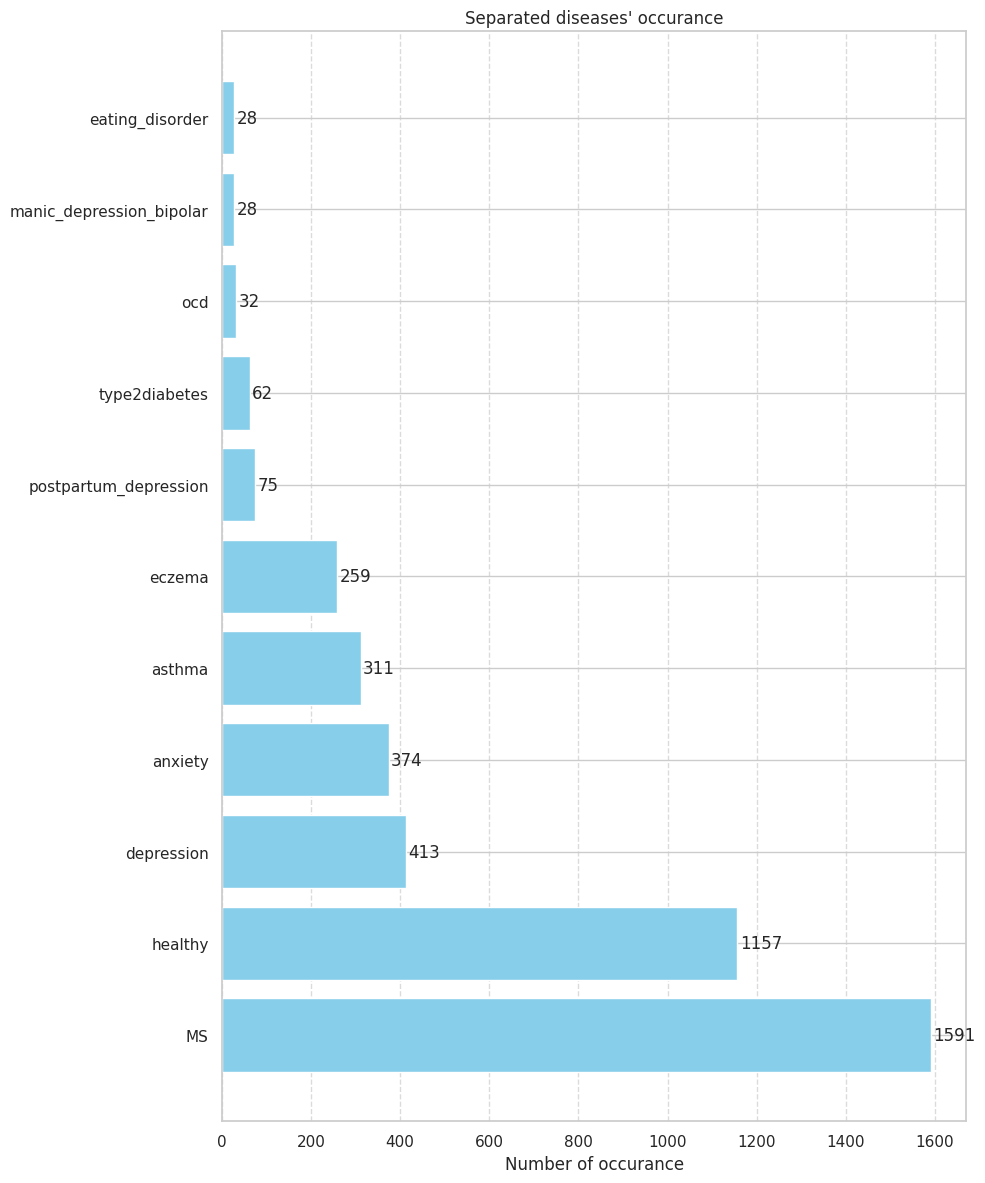

In [71]:
all_diseases = imsms["disease"].dropna().str.split(";").explode()

disease_counts = all_diseases.value_counts()

plt.figure(figsize=(10, 12))
bars = plt.barh(disease_counts.index, disease_counts.values[:20], color='skyblue')
plt.title("Separated diseases' occurance")
plt.xlabel("Number of occurance")
# plt.ylabel("Disease")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 5, bar.get_y() + bar.get_height()/2, int(xval), va='center')

plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

keywords = imsms["disease"].dropna().str.split(";").explode()

keyword_counts = keywords.value_counts()

print(keyword_counts)

disease
MS                          1591
healthy                     1157
depression                   413
anxiety                      374
asthma                       311
eczema                       259
postpartum_depression         75
type2diabetes                 62
ocd                           32
manic_depression_bipolar      28
eating_disorder               28
Name: count, dtype: int64


In [73]:
from collections import Counter

co_diseases_with_depression = has_depression["disease"].str.split(";").explode()
co_disease_counts = Counter(co_diseases_with_depression)

if "depression" in co_disease_counts:
    co_disease_counts.pop("depression")

print("Top współwystępujące zaburzenia z depresją:")
for disease, count in co_disease_counts.most_common(10):
    print(f"{disease}: {count}")


Top współwystępujące zaburzenia z depresją:
MS: 332
anxiety: 171
postpartum_depression: 75
asthma: 59
eczema: 41
manic_depression_bipolar: 28
ocd: 24
type2diabetes: 17
eating_disorder: 13


In [74]:
co_diseases_without_depression = no_depression["disease"].str.split(";").explode()
co_disease_counts_no_dep = Counter(co_diseases_without_depression)

print("\nTop zaburzenia u osób bez depresji:")
for disease, count in co_disease_counts_no_dep.most_common(10):
    print(f"{disease}: {count}")



Top zaburzenia u osób bez depresji:
MS: 1259
healthy: 1157
asthma: 252
eczema: 218
anxiety: 203
type2diabetes: 45
eating_disorder: 15
ocd: 8


In [75]:
def count_diseases1(df, column='disease'):
    keywords = ["healthy", "MS", "depression"]
    results = {key: 0 for key in keywords}
    results["depression_only"] = 0
    results["depression_with_MS"] = 0
    results["depression_with_others"] = 0

    for diseases in df[column]:
        if not isinstance(diseases, str):
            continue

        disease_list = diseases.lower().split(';')

        for key in keywords:
            if key.lower() in disease_list:
                results[key] += 1

        if "depression" in disease_list:
            if len(disease_list) == 1:  # tylko "depression"
                results["depression_only"] += 1
            elif "ms" in disease_list:  # "depression" z "MS"
                results["depression_with_MS"] += 1
            else:  # "depression" z innymi chorobami (bez "MS")
                results["depression_with_others"] += 1

    return results

result = count_diseases1(imsms, column='disease')
print(result)


{'healthy': 1157, 'MS': 1591, 'depression': 413, 'depression_only': 55, 'depression_with_MS': 297, 'depression_with_others': 61}


In [76]:
# wiersze, które nie zawierają 'MS' w kolumnie 'disease'
imsms_filtered = imsms[~imsms['disease'].str.contains('MS', case=False, na=False)]

# print(imsms_filtered)
imsms_filtered.to_csv('not_MS_metadata.csv', index=False)


In [77]:
keywords = imsms_filtered["disease"].dropna().str.split(";").explode()

keyword_counts = keywords.value_counts()

print(keyword_counts)

disease
healthy                     1157
asthma                       168
anxiety                      123
depression                   116
eczema                       114
type2diabetes                 37
postpartum_depression         14
eating_disorder                8
manic_depression_bipolar       4
ocd                            4
Name: count, dtype: int64


In [78]:
imsms_filtered.head(3)

,study_name,sample_id,subject_id,body_site,antibiotics_current_use,study_condition,disease,disease_subtype,age,age_category,...,ms_family,allergic,vitaminD_IU,children_number,roommates,recreational_drug,pets,education,occupation,collection_method
12,iMSMS_2022,s_11326.Q1.71602.0010.8.10.16,s_71602-0010,stool,no,control,healthy,healthy,66.0,senior,...,no,"dust, iodine",285.71,NaN,NaN,yes,no,post-graduate education,programmer,qtip(dry)
13,iMSMS_2022,s_11326.Q1.71602.0011.11.22.16,s_71602-0011,stool,no,control,healthy,healthy,69.0,senior,...,no,no,0.00,1.0,NaN,no,no,post-graduate education,retired,qtip(dry)
14,iMSMS_2022,s_11326.Q1.71602.0014.11.21.16,s_71602-0014,stool,no,control,healthy,healthy,69.0,senior,...,yes,no,0.00,3.0,NaN,no,no,post-graduate education,judge,qtip(dry)


In [79]:
check = imsms_filtered[["disease", "age", "gender", "BMI", "NCBI_accession"]]

check.head(10)


,disease,age,gender,BMI,NCBI_accession
12,healthy,66.0,male,27.894521,ERR3472488
13,healthy,69.0,male,28.985058,ERR3472489
14,healthy,69.0,male,25.662529,ERR3472490
15,healthy,46.0,female,21.388226,ERR3472491
16,healthy,39.0,female,26.545048,ERR3472492
17,healthy,40.0,male,37.377182,ERR3472493
18,healthy,40.0,female,20.797556,ERR3472494
49,healthy,52.0,male,23.808690,ERR3472527
50,healthy,43.0,female,22.985398,ERR3472528
51,healthy,46.0,male,33.893353,ERR3472529


Szukam par depressed i healthy takich, aby na podstawie plci, BMI i wieku byly jak najbardziej podobne.

In [61]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


# Przekształcenie disease na trzy klasy 
def simplify_disease(value):
    value = str(value).lower()
    if "depression" in value:
        return "depression"
    elif "healthy" in value:
        return "healthy"
    else:
        return "other"

imsms_filtered["disease"] = imsms_filtered["disease"].apply(simplify_disease)

# tylko healthy i depression 
metadata_filtered = imsms_filtered[imsms_filtered["disease"].isin(["healthy", "depression"])].copy()

# zmienne kategoryczne
metadata_filtered["gender"] = metadata_filtered["gender"].astype("category").cat.codes
if "country" in metadata_filtered.columns:
    metadata_filtered["country"] = metadata_filtered["country"].astype("category").cat.codes

# cechy do dopasowania
features = ["BMI", "gender", "age"]
if "country" in metadata_filtered.columns:
    features.append("country")

# podział na grupy 
depr = metadata_filtered[metadata_filtered["disease"] == "depression"].copy()
healthy = metadata_filtered[metadata_filtered["disease"] == "healthy"].copy()

# standaryzacja cech 
scaler = StandardScaler()
X_depr = scaler.fit_transform(depr[features])
X_healthy = scaler.transform(healthy[features])

# # najbliższy sąsiad z grupy healthy dla każdego z depression
# nn = NearestNeighbors(n_neighbors=1)
# nn.fit(X_healthy)
# distances, indices = nn.kneighbors(X_depr)

# # wyniki dopasowania
# matched_healthy = healthy.iloc[indices.flatten()].copy()
# matched_healthy["matched_to"] = depr.index.values
# matched_healthy["match_distance"] = distances.flatten()

# # połączenie depresji + dopasowani zdrowi 
# # matched_pairs = pd.concat([depr.reset_index(), matched_healthy.reset_index()], axis=1, keys=["depression", "matched_healthy"])

# # matched_pairs.head()
# matched_healthy1 = matched_healthy[["disease", "age", "gender", "BMI", "NCBI_accession"]]

# matched_healthy1.head()
# print(matched_pairs[["deperssion index", "BMI", "gender", "age"]])


# matched = matched_pairs[['age', 'BMI', 'gender']]

# print(matched.head())


/tmp/ipykernel_1864422/2402242518.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imsms_filtered["disease"] = imsms_filtered["disease"].apply(simplify_disease)


In [55]:
depr1 = depr[["disease", "age", "gender", "BMI", "NCBI_accession"]]
depr1.head()

,disease,age,gender,BMI,NCBI_accession
343,depression,53.0,1,25.014172,ERR3473323
351,depression,48.0,0,29.927439,ERR3473331
364,depression,43.0,0,22.118712,ERR3473346
370,depression,42.0,1,24.554980,ERR3473352
376,depression,74.0,1,24.375743,ERR3473358


In [57]:
healthy1 = healthy[["disease", "age", "gender", "BMI", "NCBI_accession"]]
healthy1.head(10)

,disease,age,gender,BMI,NCBI_accession
12,healthy,66.0,1,27.894521,ERR3472488
13,healthy,69.0,1,28.985058,ERR3472489
14,healthy,69.0,1,25.662529,ERR3472490
15,healthy,46.0,0,21.388226,ERR3472491
16,healthy,39.0,0,26.545048,ERR3472492
17,healthy,40.0,1,37.377182,ERR3472493
18,healthy,40.0,0,20.797556,ERR3472494
49,healthy,52.0,1,23.808690,ERR3472527
50,healthy,43.0,0,22.985398,ERR3472528
51,healthy,46.0,1,33.893353,ERR3472529


In [19]:
# depr[["NCBI_accession", "gender"]]

In [31]:
# identyfikator grupy dopasowania
depr = depr.copy()
depr["match_group_id"] = depr.index

matched_healthy = matched_healthy.copy()
matched_healthy["match_group_id"] = matched_healthy["matched_to"]

# łącze dane wierszowo, sortując według identyfikatora pary
combined_pairs = pd.concat([depr, matched_healthy], axis=0)

# każda para posortowana razem
combined_pairs = combined_pairs.sort_values(by=["match_group_id", "disease"], ascending=[True, False])

# reset indeksu
# combined_pairs = combined_pairs.reset_index(drop=True)

pairs = combined_pairs[["disease", "age", "gender", "BMI", "NCBI_accession"]]

pairs.head(20)


,disease,age,gender,BMI,NCBI_accession
437,healthy,54.0,1,24.793388,ERR3473419
343,depression,53.0,1,25.014172,ERR3473323
2581,healthy,48.0,0,29.319856,ERR6996468;ERR6998119
351,depression,48.0,0,29.927439,ERR3473331
2743,healthy,44.0,0,22.605592,ERR6996695
364,depression,43.0,0,22.118712,ERR3473346
2713,healthy,42.0,1,24.823473,ERR6996665;ERR6997466;ERR6998085
370,depression,42.0,1,24.554980,ERR3473352
2749,healthy,73.0,1,25.863443,ERR6996701;ERR6997479;ERR6998132
376,depression,74.0,1,24.375743,ERR3473358


In [21]:
# combined_pairs.shape

In [22]:
# # naprawiamy NCBI_accession: bierzemy pierwszy kod przed średnikiem
# for df in [depr, matched_healthy]:
#     df["NCBI_accession"] = df["NCBI_accession"].astype(str).str.split(";").str[0]

# # reset indeksu, żeby były w tej samej kolejności
# depr = depr.reset_index(drop=True)
# matched_healthy = matched_healthy.reset_index(drop=True)

# # przeplatanie: depresja[0], healthy[0], depresja[1], healthy[1], itd.
# combined = pd.concat([depr, matched_healthy], axis=0)
# combined = combined.sort_index(kind="merge").reset_index(drop=True)

# # teraz w kolumnie "NCBI_accession" zostają pojedyncze ERR/SRR
# pairs = combined[["NCBI_accession", "disease", "age", "gender", "BMI"]]

# print(pairs.head(10))


In [23]:
# combined.shape

In [24]:
# combined.head()

In [26]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# uproszczenie kolumny disease
def simplify_disease(value):
    value = str(value).lower()
    if "depression" in value:
        return "depression"
    elif "healthy" in value:
        return "healthy"
    else:
        return "other"

imsms_filtered["disease"] = imsms_filtered["disease"].apply(simplify_disease)

# tylko healthy i depression
metadata_filtered = imsms_filtered[imsms_filtered["disease"].isin(["healthy", "depression"])].copy()

# kodowanie zmiennych kategorycznych
metadata_filtered["gender"] = metadata_filtered["gender"].astype("category").cat.codes
if "country" in metadata_filtered.columns:
    metadata_filtered["country"] = metadata_filtered["country"].astype("category").cat.codes

# cechy do dopasowania
features = ["BMI", "gender", "age"]
if "country" in metadata_filtered.columns:
    features.append("country")

# podział na grupy
depr = metadata_filtered[metadata_filtered["disease"] == "depression"].copy()
healthy = metadata_filtered[metadata_filtered["disease"] == "healthy"].copy()

# standaryzacja cech
scaler = StandardScaler()
X_depr = scaler.fit_transform(depr[features])
X_healthy = scaler.transform(healthy[features])

# nearest neighbors
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_healthy)
distances, indices = nn.kneighbors(X_depr)

# dopasowania: depresja + odpowiadający healthy
depr_matched = depr.reset_index(drop=False)   # reset, żeby mieć indeks jako kolumnę
healthy_matched = healthy.iloc[indices.flatten()].reset_index(drop=False)

# przeplatanie: depression, healthy, depression, healthy...
rows = []
for i in range(len(depr_matched)):
    rows.append(depr_matched.iloc[i])
    rows.append(healthy_matched.iloc[i])

final_df = pd.DataFrame(rows).reset_index(drop=True)

# final_df.shape
# final_df.head(20)

# zapis do CSV
# final_df.to_csv("matched_depr_healthy.csv", index=False)

# print("Nowy plik zapisany: matched_depr_healthy.csv")


/tmp/ipykernel_1864422/161351338.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imsms_filtered["disease"] = imsms_filtered["disease"].apply(simplify_disease)


In [25]:
final_df.shape
final_df.head(20)

NameError: name 'final_df' is not defined

In [64]:
# combined_pairs.to_csv("cleaned_paired_imsms.csv", index=False)
combined.to_csv("paired_imsms.csv", index=False)

## Age distribution

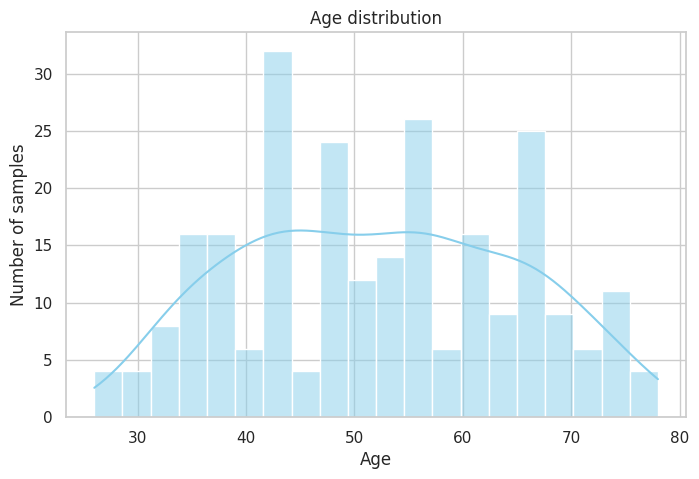

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(combined_pairs["age"], bins=20, kde=True, color="skyblue")
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of samples")
plt.show()

## BMI distribution

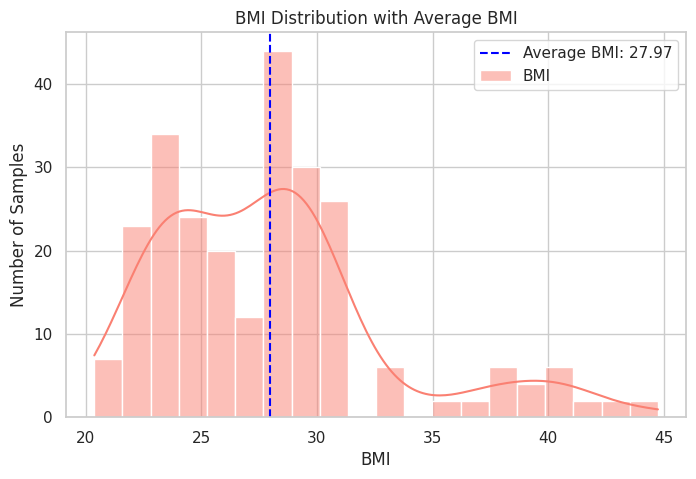

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(combined_pairs["BMI"], bins=20, kde=True, color="salmon", label="BMI")

average_bmi = combined_pairs["BMI"].mean()
plt.axvline(average_bmi, color="blue", linestyle="dashed", label=f"Average BMI: {average_bmi:.2f}")

plt.title("BMI Distribution with Average BMI")
plt.xlabel("BMI")
plt.ylabel("Number of Samples")
plt.legend()
plt.show()

## Study condition distribution

/tmp/ipykernel_525759/3885524540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=combined_pairs["disease"], palette="pastel", order=combined_pairs["disease"].value_counts().index)


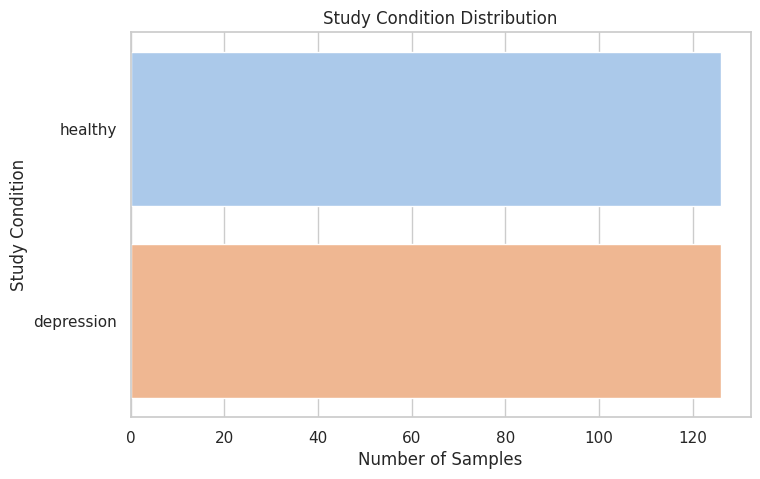

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(y=combined_pairs["disease"], palette="pastel", order=combined_pairs["disease"].value_counts().index)
plt.title("Study Condition Distribution")
plt.xlabel("Number of Samples")
plt.ylabel("Study Condition")
plt.show()

## Age Comparison Across Study Conditions

/tmp/ipykernel_525759/2793037834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=combined_pairs, palette="Set2")


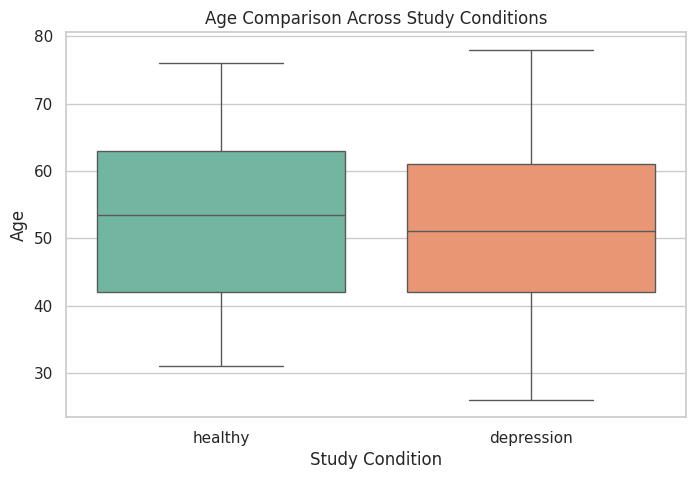

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="disease", y="age", data=combined_pairs, palette="Set2")
plt.title("Age Comparison Across Study Conditions")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

## Correlation Analysis

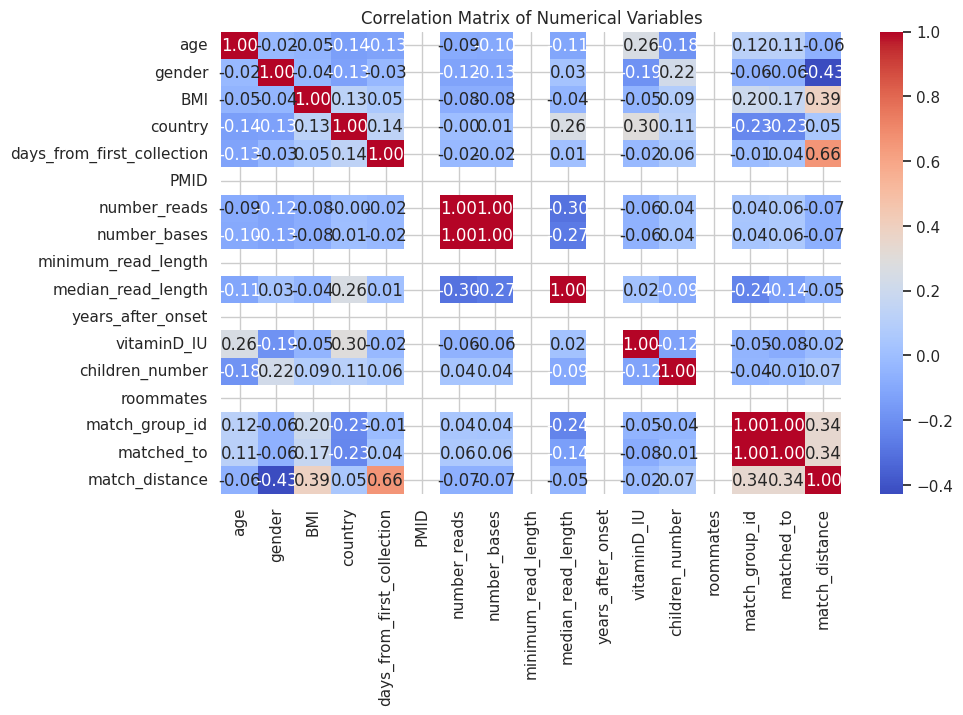

/tmp/ipykernel_525759/4088039963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="BMI", data=combined_pairs, palette="muted")


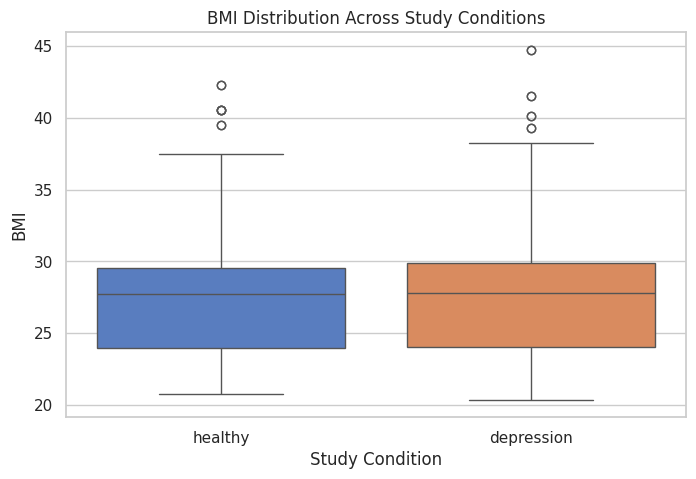

/tmp/ipykernel_525759/4088039963.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="disease", y="age", data=combined_pairs, palette="muted")


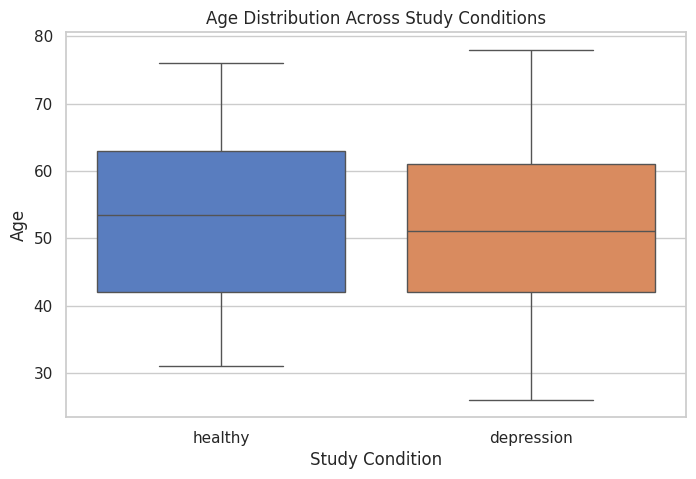

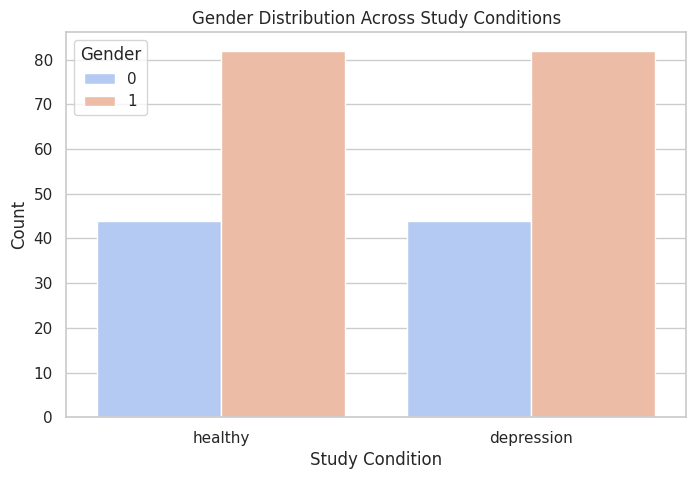

In [40]:
correlation_matrix = combined_pairs.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")

plt.show()

# Health condition correlation analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x="disease", y="BMI", data=combined_pairs, palette="muted")
plt.title("BMI Distribution Across Study Conditions")
plt.xlabel("Study Condition")
plt.ylabel("BMI")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="disease", y="age", data=combined_pairs, palette="muted")
plt.title("Age Distribution Across Study Conditions")
plt.xlabel("Study Condition")
plt.ylabel("Age")
plt.show()

if "gender" in combined_pairs.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="disease", hue="gender", data=combined_pairs, palette="coolwarm")
    plt.title("Gender Distribution Across Study Conditions")
    plt.xlabel("Study Condition")
    plt.ylabel("Count")
    plt.legend(title="Gender")
    plt.show()
    
# if "disease" in imsms.columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(y=combined_pairs["disease"], palette="pastel", order=combined_pairs["disease"].value_counts().index)
#     plt.title("Disease Distribution")
#     plt.xlabel("Number of Samples")
#     plt.ylabel("Disease")
#     plt.show()